In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn import neighbors, tree, svm, metrics
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

from IPython.display import Image  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# import pydotplus

# Reading and Parsing Data

In [2]:
train = pd.read_csv("./data/train.csv")  
test = pd.read_csv("./data/test.csv")
x_data = train.drop('Activity', 1)
y_data = train['Activity']
x_test = test.drop('Activity', 1)
y_test = test['Activity']

## Function Definitions

In [3]:
def get_correct_rate(X, Y, classifier):
    """
    Returns the correct rate of a given pre-trained classifier.
    """
    prediction = classifier.predict(X)
    correct_list=prediction==Y
    return sum(correct_list)/len(correct_list)

def knn_fit(X, Y, X_test, Y_test, k_list):
    """
    Returns the correct prediction rates of kNN models for the given values of K.
    """
    correct_rates = []
    for k in k_list:
        k_classifier = sk.neighbors.KNeighborsClassifier(n_neighbors=k)
        k_classifier.fit(X, Y)
        correct_rates.append(get_correct_rate(X_test, Y_test, k_classifier))
    return correct_rates

# Full Dataset

# KNN

In [4]:
k_vals = [2, 5, 10, 15, 25, 50, 75, 100]
correct_rates = knn_fit(x_data, y_data, x_test, y_test, k_vals)

print('Maximum success rate:', "{0:.1f}%".format(100*max(correct_rates)))
print('Optimal value of k:', k_vals[correct_rates.index(max(correct_rates))])

Maximum success rate: 81.7%
Optimal value of k: 10


# LDA

In [5]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_data, y_data)
lda_correct = get_correct_rate(x_test, y_test, lda)
print("LDA correct rate:", "{0:.1f}%".format(lda_correct*100))

LDA correct rate: 96.4%


/home/matt/Documents/data-science/Data-Science-Final/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Plotting LDA

/home/matt/Documents/data-science/Data-Science-Final/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


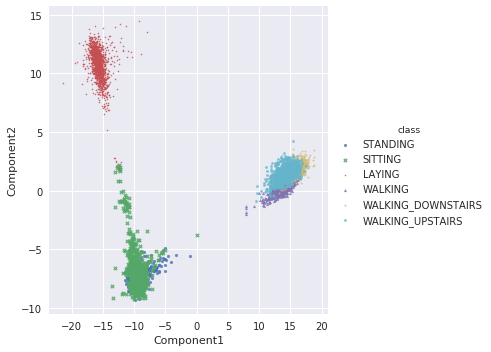

In [6]:
predicted_train = lda.predict(x_data)
transform_points = lda.fit_transform(x_data, y_data)
transform_data = pd.DataFrame(transform_points)
transform_data.columns = ['Component1', 'Component2']
transform_data['class'] = np.asarray(predicted_train)
sns.lmplot( x="Component1", y="Component2", data=transform_data, fit_reg=False, hue='class', legend=True, markers=["o", "x", ".", "^", "*", "p"], scatter_kws={'s': 10})


# SVM

In [7]:
clf = sk.svm.SVC()
clf.fit(x_data, y_data)  
pred1 = clf.predict(x_test)
print(sk.metrics.accuracy_score(y_test, pred1))

0.9307770614183916


# Tree-Based

In [8]:
clf1 = sk.tree.DecisionTreeClassifier()
clf1 = clf1.fit(x_data, y_data)
pred2 = clf1.predict(x_test)
print(sk.metrics.accuracy_score(y_test, pred2))

0.8629114353579912


### Visualizing Tree-Based

In [9]:
dot_data = sk.externals.six.StringIO()

tree.export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

# Splitting Up Time and Frequency Data

In [10]:
frequency = [col for col in train if col.startswith('f')]
time = [col for col in train if col.startswith('t')]
freq_x_data = train[frequency]
time_x_data = train[time]
freq_x_test = test[frequency]
time_x_test = test[time]

y_data = train['Activity']
y_test = test['Activity']

### KNN

In [11]:
correct_rates_time = knn_fit(time_x_data, y_data, time_x_test, y_test, k_vals)

print('Maximum success rate with time predictors:', "{0:.1f}%".format(100*max(correct_rates)))
print('Optimal value of k:', k_vals[correct_rates_time.index(max(correct_rates))])

correct_rates_freq = knn_fit(freq_x_data, y_data, freq_x_test, y_test, k_vals)

print('Maximum success rate with freq predictors:', "{0:.1f}%".format(100*max(correct_rates)))
print('Optimal value of k:', k_vals[correct_rates_freq.index(max(correct_rates))])


Maximum success rate with time predictors: 81.7%


ValueError: 0.8167628096369189 is not in list

# LDA

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(time_x_data, y_data)
lda_correct_time = get_correct_rate(time_x_test, y_test, lda)
print("LDA correct rate with time predictors:", "{0:.1f}%".format(lda_correct_time*100))

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(freq_x_data, y_data)
lda_correct_freq = get_correct_rate(freq_x_test, y_test, lda)
print("LDA correct rate with frequency predictors:", "{0:.1f}%".format(lda_correct_freq*100))

## Plotting kNN

In [ ]:
lda.fit(time_x_data, y_data)
predicted_train = lda.predict(time_x_data)
transform_points = lda.fit_transform(time_x_data, y_data)
transform_data = pd.DataFrame(transform_points)
transform_data.columns = ['Component1', 'Component2']
transform_data['class'] = np.asarray(predicted_train)
sns.lmplot( x="Component1", y="Component2", data=transform_data, fit_reg=False, hue='class', legend=True, markers=["o", "x", ".", "^", "*", "p"], scatter_kws={'s': 10})


In [ ]:
lda.fit(freq_x_data, y_data)
predicted_train = lda.predict(freq_x_data)
transform_points = lda.fit_transform(freq_x_data, y_data)
transform_data = pd.DataFrame(transform_points)
transform_data.columns = ['Component1', 'Component2']
transform_data['class'] = np.asarray(predicted_train)
sns.lmplot( x="Component1", y="Component2", data=transform_data, fit_reg=False, hue='class', legend=True, markers=["o", "x", ".", "^", "*", "p"], scatter_kws={'s': 10})


### SVM

In [ ]:
clf = sk.svm.SVC(decision_function_shape='ovo')
clf.fit(freq_x_data, y_data)  
pred1 = clf.predict(freq_x_test)
print(sk.metrics.accuracy_score(y_test, pred1))

clf = sk.svm.SVC(decision_function_shape='ovo')
clf.fit(time_x_data, y_data)  
pred1 = clf.predict(time_x_test)
print(sk.metrics.accuracy_score(y_test, pred1))

### Tree-Based

In [ ]:
clf1 = sk.tree.DecisionTreeClassifier()
clf1 = clf1.fit(freq_x_data, y_data)
pred2 = clf1.predict(freq_x_test)
print(sk.metrics.accuracy_score(y_test, pred2))

clf1 = sk.tree.DecisionTreeClassifier()
clf1 = clf1.fit(time_x_data, y_data)
pred2 = clf1.predict(time_x_test)
print(sk.metrics.accuracy_score(y_test, pred2))

# Dimension Reduction

In [ ]:
lsvc = sk.svm.LinearSVC(C=0.01, penalty="l1", dual=False).fit(x_data, y_data)
model = sk.feature_selection.SelectFromModel(lsvc, prefit=True)
X_new = model.transform(x_data)
new_x_data = x_data[x_data.columns[model.get_support()]]
new_x_test = x_test[x_test.columns[model.get_support()]]

### KNN

In [ ]:
k_vals = [2, 5, 10, 15, 25, 50, 75, 100]
correct_rates_subset = knn_fit(new_x_data, y_data, new_x_test, y_test, k_vals)

print('Maximum success rate:', "{0:.1f}%".format(100*max(correct_rates)))
print('Optimal value of k:', k_vals[correct_rates_subset.index(max(correct_rates))])

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(new_x_data, y_data)
lda_correct_subset = get_correct_rate(new_x_test, y_test, lda)
print("LDA correct rate with subset predictors:", "{0:.1f}%".format(lda_correct_subset*100))

## Plotting LDA

In [ ]:
lda.fit(new_x_data, y_data)
predicted_train = lda.predict(new_x_data)
transform_points = lda.fit_transform(new_x_data, y_data)
transform_data = pd.DataFrame(transform_points)
transform_data.columns = ['Component1', 'Component2']
transform_data['class'] = np.asarray(predicted_train)
sns.lmplot( x="Component1", y="Component2", data=transform_data, fit_reg=False, hue='class', legend=True, markers=["o", "x", ".", "^", "*", "p"], scatter_kws={'s': 10})


### SVM

In [ ]:
clf = sk.svm.SVC(decision_function_shape='ovo')
clf.fit(new_x_data, y_data)  
pred1 = clf.predict(new_x_test)
print(sk.metrics.accuracy_score(y_test, pred1))

### Tree-Based

In [ ]:
clf1 = sk.tree.DecisionTreeClassifier()
clf1 = clf1.fit(new_x_data, y_data)
pred2 = clf1.predict(new_x_test)
print(sk.metrics.accuracy_score(y_test, pred2))